<a href="https://colab.research.google.com/github/shubhs777c/Play-store-app-EDA-analysis/blob/main/AIR_BNB_PROJECT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction **

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.



In [1]:
#Importing necessary libraries required for coding operations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from datetime import datetime
from datetime import date
import seaborn as sns

In [2]:
# Mounting the drive .
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
# Reading the csv file .
filepath=("/content/drive/MyDrive/project csv files/AIR BNB PROJECT/Airbnb NYC 2019.csv")
AIRBNB_df = pd.read_csv(filepath)

In [79]:
# This shows the maximum rows of dataset .
pd.options.display.max_rows = 250

In [80]:
# Mentioning the shape of data. 
print(f' We have total {AIRBNB_df.shape[0]} rows and {AIRBNB_df.shape[1]} columns.')

 We have total 48895 rows and 16 columns.


In [82]:
# Look at the first 5 rows of data set 
AIRBNB_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [83]:
#Last 5 rows of datset.
AIRBNB_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [84]:
# Information of dataset.
AIRBNB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [85]:
# Describe the dataset.
AIRBNB_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [11]:
# finding the duplicate values from our datset.
AIRBNB_df.duplicated().value_counts()

False    48895
dtype: int64

There are no one duplicated values present in our datset.

In [88]:
# Illustrating the datatypes of dataset.
data_dtypes_AIRBNB_df = AIRBNB_df.dtypes.reset_index()
data_dtypes_AIRBNB_df.rename(columns = {'index':'Columns', 0:'Dtype'}, 
                      inplace=True)
data_dtypes_AIRBNB_df

,Columns,Dtype
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,object
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,int64


In [90]:
# Calculating the count of the datatypes in dataset.
data_dtypes_AIRBNB_df[data_dtypes_AIRBNB_df['Dtype']=='object']
data_dtypes_AIRBNB_df['Dtype'].value_counts()

int64      7
object     6
float64    3
Name: Dtype, dtype: int64

In [15]:
#Checking the null values in dataset.
AIRBNB_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replacing the null values from the dataset.

In [91]:
# 1st way to replace null values.
#AIRBNB_df['name'].fillna('not known',inplace = True)
#AIRBNB_df['host_name'].fillna('not present',inplace = True)
#AIRBNB_df['last_review'].fillna('not known', inplace = True)
#AIRBNB_df['reviews_per_month'].fillna('not known', inplace = True)

In [92]:
# 2nd way to replace null values.
null_columns=['name','host_name','last_review','reviews_per_month']
for col in null_columns:
  AIRBNB_df[col].fillna(0,inplace=True)

In [93]:
#Cross checking of null values after replacing with the specific operations.
AIRBNB_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [94]:
# Again checking the information of dataset to confirm the non -null count clearly.
AIRBNB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
# Describe the dataset to perform some operations .
AIRBNB_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


As we can see that there are maximum price of an airbnb property is 10000 but the minimum price of any property is 0 and that can not be possible so we need to make some changes in data set

In [108]:
# Calculating the minimum and maximum values considering the (price) of dataset .
MINIMUM=AIRBNB_df['price'].min()
print(MINIMUM)

MAXIMUM=AIRBNB_df['price'].max()
print(MAXIMUM)


10
10000


In [109]:
# The dataset is skwedly distributed so we calculate median and replace the null values with median.
MEDIAN = AIRBNB_df['price'].median()
AIRBNB_df['price'] = AIRBNB_df['price'].replace(0,MEDIAN)

In [110]:
# Look at the dataset after filling null values with median for (price) feature.
AIRBNB_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.744534,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144266,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

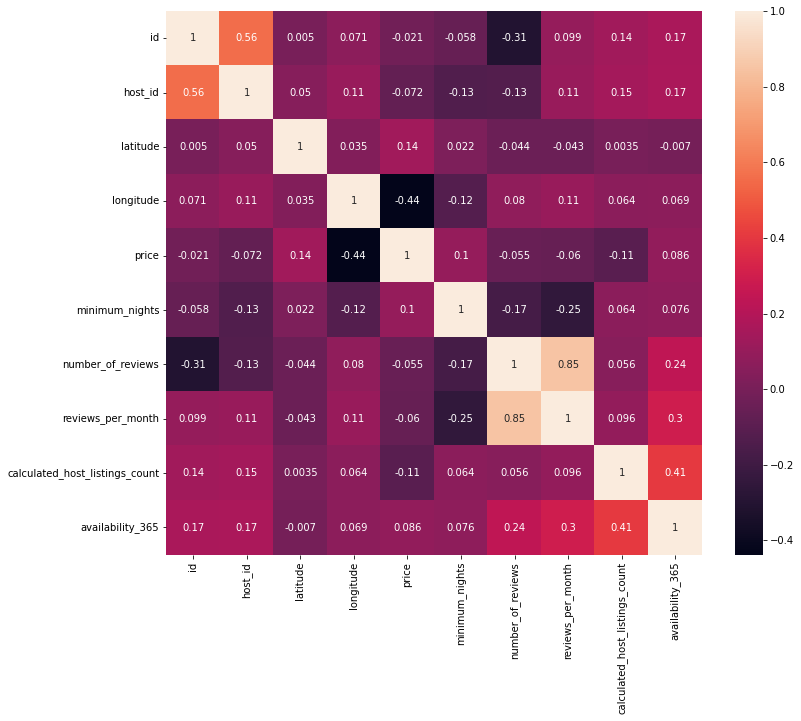

In [25]:
# This graph showing the correlation between Variables.
corr = AIRBNB_df.corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
AIRBNB_df.columns

In [113]:
# Performing group by operations to aggregate data with considering features.
df1 = AIRBNB_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
df2 = df1.sort_values('calculated_host_listings_count',ascending = False)
area_count = df2.head(10)
area_count

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,230
9746,Michael,Manhattan,212
3254,David,Manhattan,202
9745,Michael,Brooklyn,159
6812,John,Manhattan,151
3253,David,Brooklyn,142
7279,Kara,Manhattan,135
9860,Mike,Manhattan,134
436,Alex,Manhattan,134


Text(0, 0.5, 'calculated_host_listings_count')

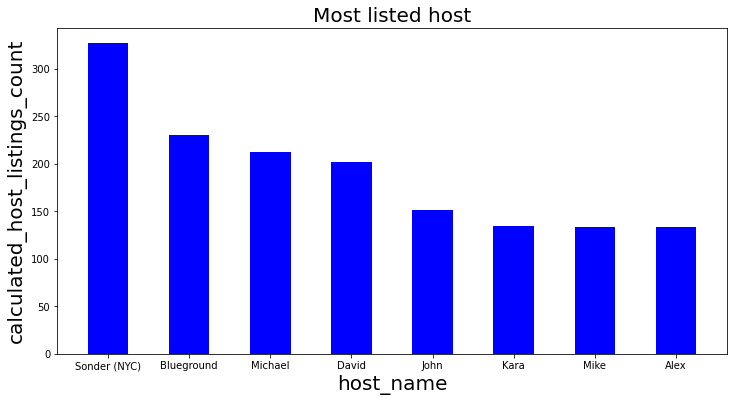

In [124]:
# Visualisation using bar chart.
plt.rcParams['figure.figsize'] = (12, 6)
plt.bar(area_count['host_name'],area_count['calculated_host_listings_count'],color = 'blue',width = 0.5)
plt.title('Most listed host',{'fontsize':20})
plt.xlabel('host_name',{'fontsize':20})
plt.ylabel('calculated_host_listings_count',{'fontsize':20})

This bar plot shows that most listed host of host name sonder(NYC) from manhatten.

In [116]:
# Performing group by operations considering room type with respect to prices. 
prices_room_type =AIRBNB_df.groupby('room_type').agg({'price':['max','mean'],'id':'count'}).reset_index()
prices = prices_room_type.head()
prices

room_type  price                 id
                      max        mean  count
0  Entire home/apt  10000  211.802590  25409
1     Private room  10000   89.814208  22326
2      Shared room   1800   70.310345   1160

Finding unique values along with its value counts.

In [117]:
AIRBNB_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [118]:
AIRBNB_df['room_type'].count()

48895

In [119]:
AIRBNB_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [120]:
AIRBNB_df['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
5        3034
7        2058
6         752
14        562
10        483
29        340
15        279
20        223
28        203
31        201
21        135
8         130
60        106
90        104
12         91
25         82
9          80
13         54
180        43
11         33
45         32
365        29
120        28
18         28
16         18
27         17
26         16
100        15
35         15
24         14
17         14
50         14
40         13
80          9
19          8
32          8
22          8
23          8
70          8
59          6
300         6
150         6
360         5
500         5
200         4
75          4
55          4
999         3
62          3
91          3
110         3
240         3
93          2
160         2
47          2
88          2
105         2
33          2
53          2
115         2
181         2
210         2
270         2
44          2
133         2
56          2
99    

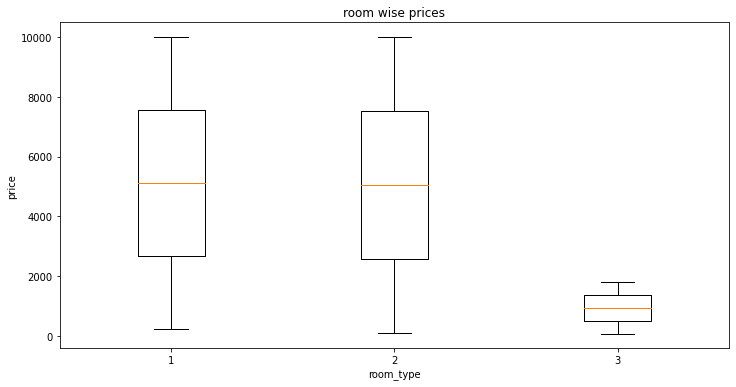

In [121]:
# Graphical representation of Room types with respect to price.
plt.boxplot(prices_room_type['price'])
plt.title('room wise prices')
plt.xlabel('room_type')
plt.ylabel('price')
plt.show()

In [122]:
avg_price = AIRBNB_df.groupby('neighbourhood_group').agg({'price':['mean']})
avg_price

,price
,mean
neighbourhood_group,
Bronx,87.593951
Brooklyn,124.430661
Manhattan,196.880707
Queens,99.517649
Staten Island,114.812332


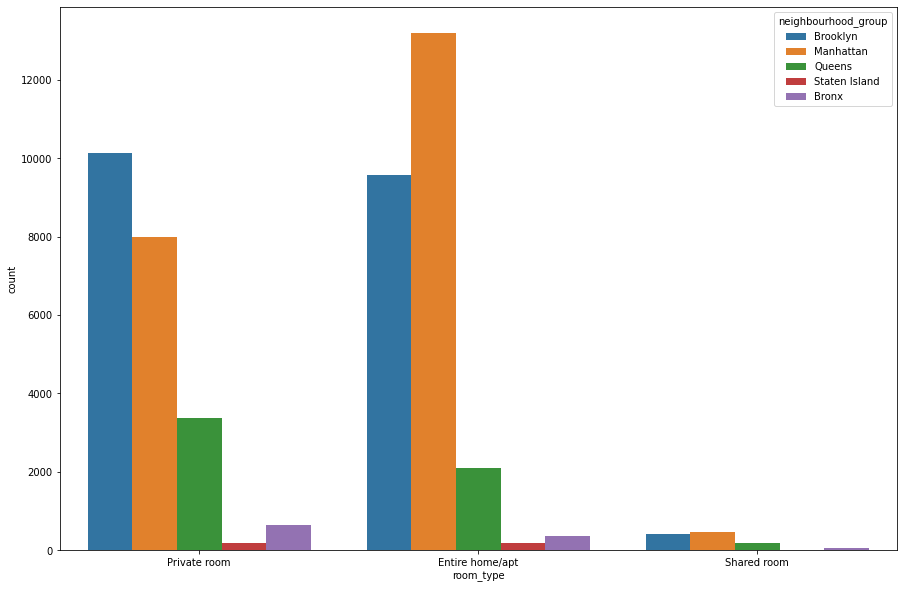

In [126]:
# Room type distribution in the neighbourhood group by counterplot.
plt.figure(figsize=(15,10))
ax = sns.countplot(x="room_type", data=AIRBNB_df,hue="neighbourhood_group")

In [127]:
df3 = AIRBNB_df.groupby(['host_name'])['minimum_nights'].count().reset_index()

In [128]:
df4 = df3.sort_values('minimum_nights',ascending = False)
df5 = df4.head(5)
df5

,host_name,minimum_nights
7136,Michael,417
2377,David,403
9782,Sonder (NYC),327
4990,John,294
315,Alex,279


Text(0, 0.5, 'Minimum night stay')

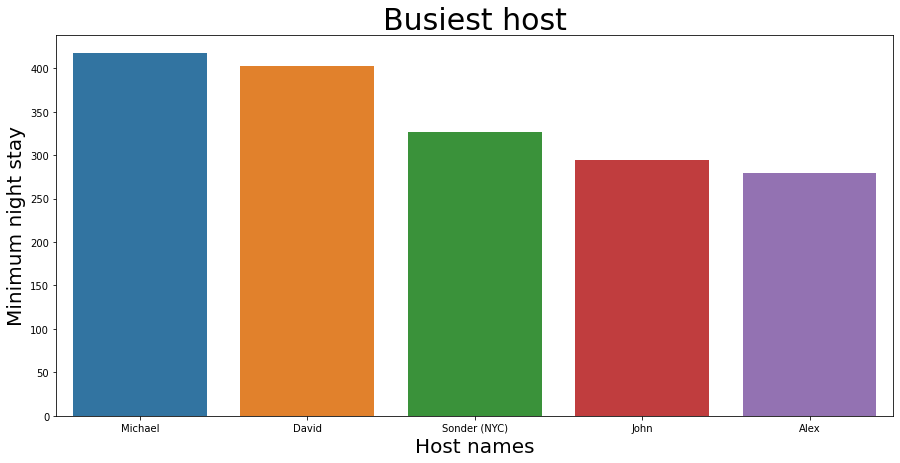

In [129]:
# Data visualization(barplot).
plt.rcParams['figure.figsize'] = (15,7)
z = sns.barplot(x = df5['host_name'],y = df5['minimum_nights'])
z.set_title('Busiest host',{'fontsize':30})
z.set_xlabel('Host names',{'fontsize':20})
z.set_ylabel('Minimum night stay',{'fontsize':20})

In [130]:
# Performing group by on number of reviews and sorting the result
df = AIRBNB_df.groupby('name')['number_of_reviews'].sum().reset_index()

In [132]:
Reviews = df.sort_values(	'number_of_reviews',ascending=False)
no_of_reviews = Reviews.head(7)
no_of_reviews 

,name,number_of_reviews
32778,Private Bedroom in Manhattan,666
36517,Room near JFK Queen Bed,629
5723,Beautiful Bedroom in Manhattan,617
20861,Great Bedroom in Manhattan,607
36162,Room Near JFK Twin Beds,576
40541,Steps away from Laguardia airport,543
27708,Manhattan Lux Loft.Like.Love.Lots.Look !,540


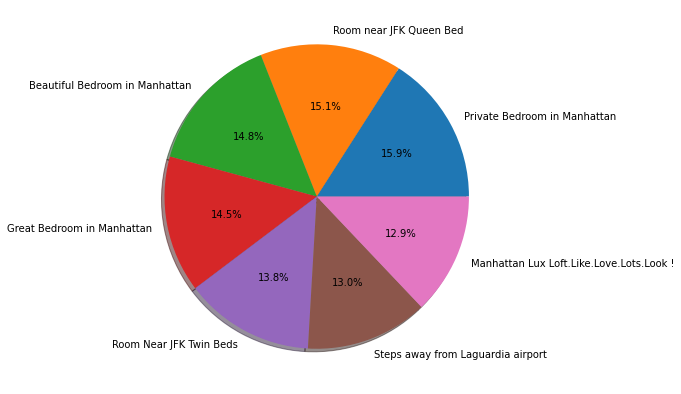

In [134]:
# Pie chart distribution of reviwes.
plt.pie(no_of_reviews['number_of_reviews'],labels=no_of_reviews['name'],autopct ='%2.1f%%',shadow = True)

plt.show()

In [135]:
#getting the values where availabilities of room are  more than 200 days
often_available = AIRBNB_df[AIRBNB_df['availability_365'] >= 150]

In [136]:
often_available['availability_365'].count()

16851

In [137]:
#calculating the percentage 
percent_available_more =often_available['availability_365'].count()/AIRBNB_df['availability_365'].count()*100
percent_available_more.round(2)

34.46

In [138]:
#so as we know tht all airbnb have different id so we can check with tht
DF_highest_no_of_airbnb= AIRBNB_df.groupby('neighbourhood_group')['id'].count().reset_index()
#here id the number of airbnb 
DF_highest_no_of_airbnb.sort_values('id',ascending = False)

,neighbourhood_group,id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


Text(0, 0.5, 'Number of airbnb')

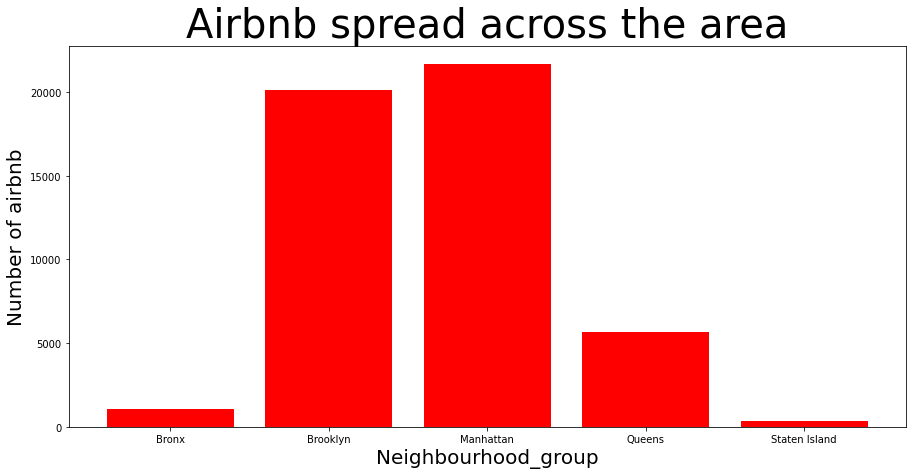

In [139]:
#here id represent the number of airbnb present in tht neighbourhood group

plt.bar(DF_highest_no_of_airbnb['neighbourhood_group'],DF_highest_no_of_airbnb['id'],color = 'red')
plt.title('Airbnb spread across the area',{'fontsize': 40})
plt.xlabel('Neighbourhood_group',{'fontsize':20})
plt.ylabel('Number of airbnb',{'fontsize':20})

SO here we can see tht manhattan has the most number of airbnb after then brooklyn has the second place.Bronx and staten island have very less number of airbnb present